# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

# Load data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/annthyroid-unsupervised-ad.csv', header=None)
print(df.shape)
df.head()

(6916, 22)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.061,0.006,0.023,0.087,0.026,o
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.029,0.015,0.061,0.096,0.064,o
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.029,0.019,0.058,0.103,0.056,o
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.114,0.003,0.024,0.061,0.039,o
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.049,0.003,0.005,0.116,0.004,o


In [ ]:
# check for null
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64

In [ ]:
COLUMNS = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
              'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
              'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid',
              'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
              'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'outlier_label']
df.columns = COLUMNS

COLUMNS_WITHOUT_LABEL = [col for col in COLUMNS if col != 'outlier_label']

df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,outlier_label
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.061,0.006,0.023,0.087,0.026,o
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.029,0.015,0.061,0.096,0.064,o
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.029,0.019,0.058,0.103,0.056,o
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.114,0.003,0.024,0.061,0.039,o
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.049,0.003,0.005,0.116,0.004,o


# Analysis & Formating

In [ ]:
df.outlier_label.value_counts()

outlier_label
n    6666
o     250
Name: count, dtype: int64

In [ ]:
# Convert outlier label 'o' to 1 and 'n' to 0
df['outlier_label'] = df['outlier_label'].map({'o': 1, 'n': 0})
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,outlier_label
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.061,0.006,0.023,0.087,0.026,1
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.029,0.015,0.061,0.096,0.064,1
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.029,0.019,0.058,0.103,0.056,1
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.114,0.003,0.024,0.061,0.039,1
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.049,0.003,0.005,0.116,0.004,1


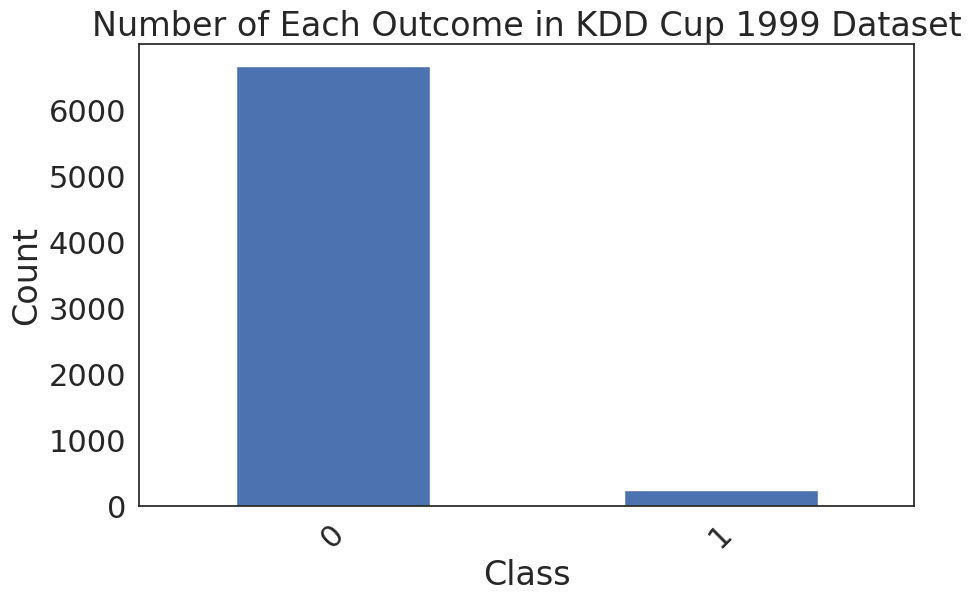

In [ ]:
# Draw a graph showing the distribution of class
outcome_counts = df['outlier_label'].value_counts()

plt.figure(figsize=(10, 6))
outcome_counts.plot(kind='bar')
plt.title('Number of Each Outcome in KDD Cup 1999 Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## separate the Fraud and the Normal dataset for future reference
Anomaly = df[df['outlier_label'] == 1]
Normal = df[df['outlier_label'] == 0]

print("Shape of Anomaly and Normal Datasets: ", Anomaly.shape, Normal.shape)

# Find the ration of Outlier to Normal
outlier_fraction = len(Anomaly)/float(len(Normal))

print("Fraction of outlier to normal: ",outlier_fraction)

Shape of Anomaly and Normal Datasets:  (250, 22) (6666, 22)
Fraction of outlier to normal:  0.0375037503750375


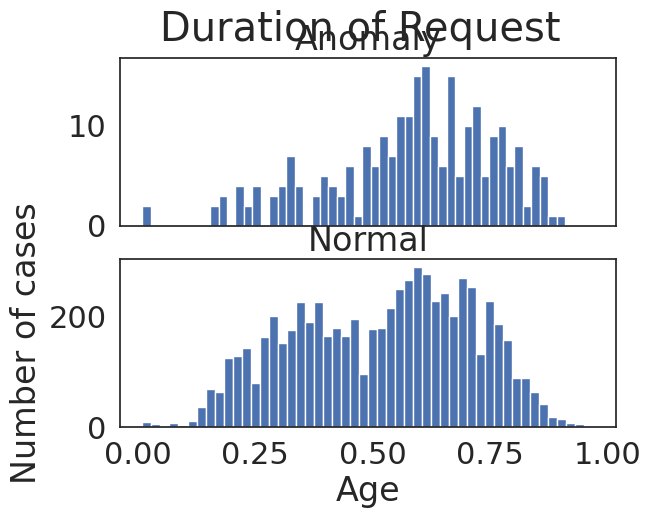

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Duration of Request')
ax1.hist(Anomaly.age, bins=50)
ax1.set_title('Anomaly')
ax2.hist(Normal.age, bins=50)
ax2.set_title('Normal')
plt.xlabel('Age')
plt.ylabel('Number of cases')
# make the y-axis unit in logarithmic scale
plt.show()

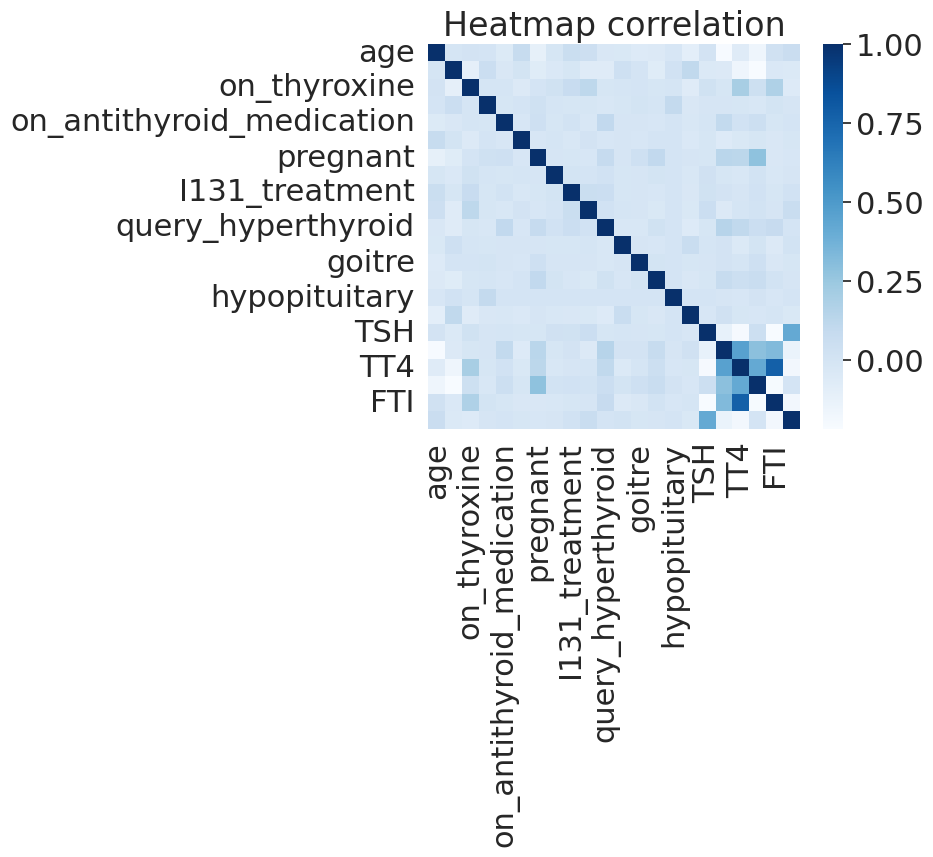

In [ ]:
import seaborn

df_corr = df.corr()

plt.figure(figsize=(6,5))
seaborn.heatmap(df_corr, cmap='Blues')
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

# Useful Functions

In [ ]:
# When given the actual class and predicted class it plots confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Anomaly Detection

## PCA

In [ ]:
dataframe = df.copy()

In [ ]:
dataframe.shape

(6916, 12)

In [ ]:
# Separate the dataset into normal and anomaly
df_normal = dataframe[dataframe['outlier_label'] == 0]
df_anomaly = dataframe[dataframe['outlier_label'] == 1]

In [ ]:
# Separate features and target variable
X = dataframe.drop('outlier_label', axis=1)
y = dataframe['outlier_label']

In [ ]:
# Scale the data with StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.90)  # Retain 90% of the variance
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Calculate Cumulative Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

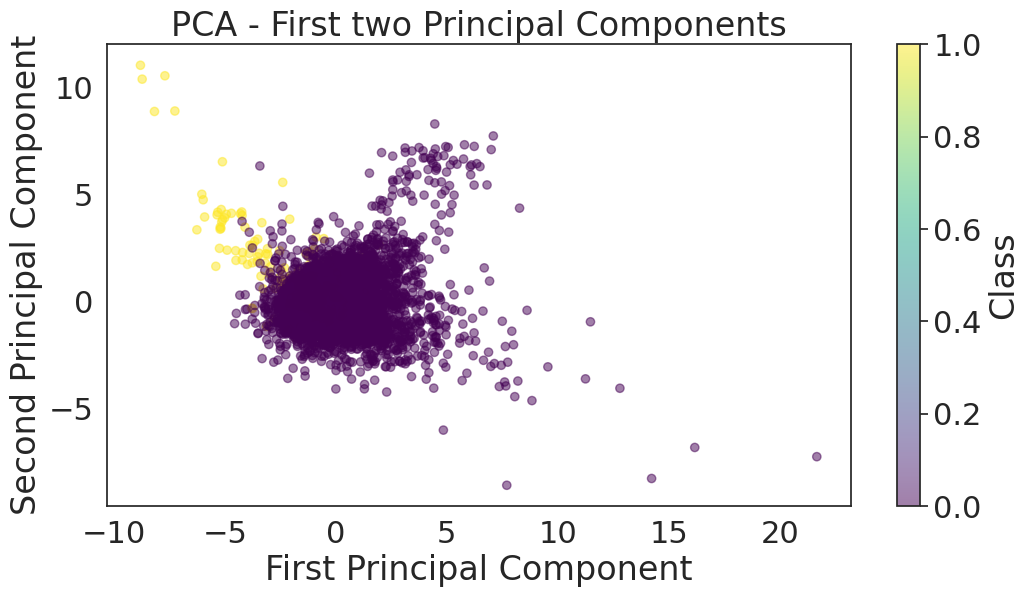

In [ ]:
# Plot the first two principal components
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.colorbar(label='Class')
plt.title('PCA - First two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

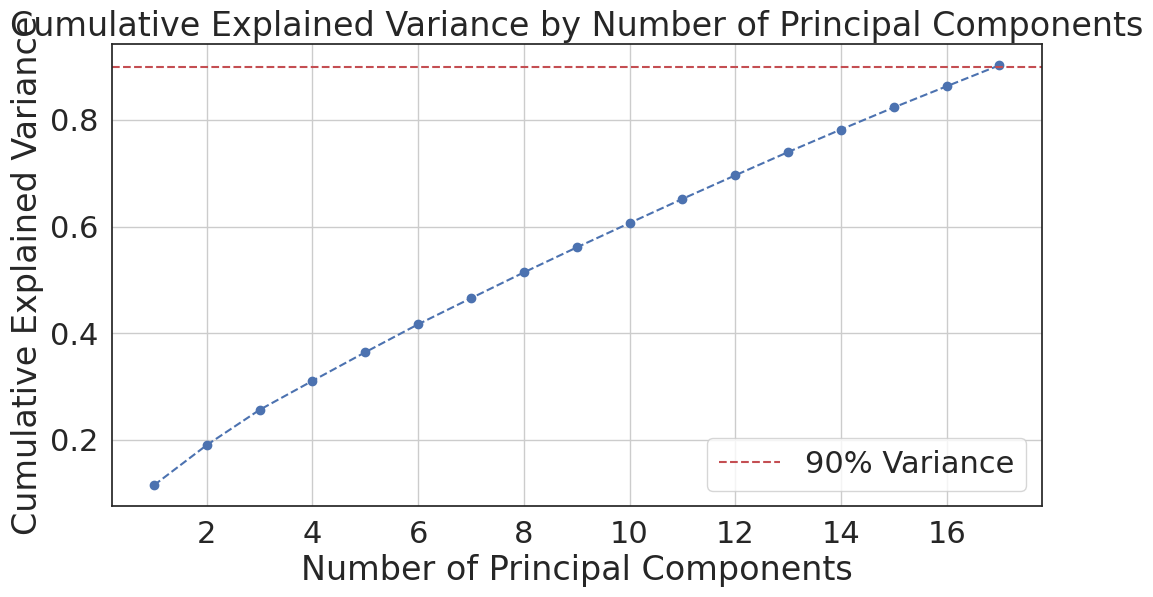

In [ ]:
# Plot the cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Reconstruct the original data from the principal components
X_reconstructed = pca.inverse_transform(X_pca)

In [ ]:
# Calculate the reconstruction error for each data point
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2, axis=1)
reconstruction_error

array([0.04121055, 0.04251998, 0.1238732 , ..., 0.00699819, 0.0467393 ,
       0.03267967])

In [ ]:
# Determine a threshold for identifying anomalies
# For example we selected 95th percentile of the reconstruction errors
threshold = np.percentile(reconstruction_error, 90)

In [ ]:
# Identify anomalies based on the reconstruction error
y_pred = (reconstruction_error > threshold).astype(int)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      6666
           1       0.05      0.13      0.07       250

    accuracy                           0.87      6916
   macro avg       0.51      0.52      0.50      6916
weighted avg       0.93      0.87      0.90      6916



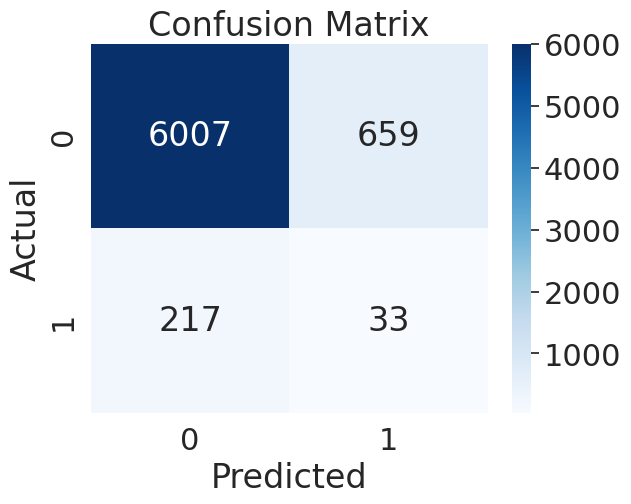

In [ ]:
# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
plot_confusion_matrix(y, y_pred)

## AutoEncoder

In [ ]:
dataframe = df.copy()
dataframe.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,outlier_label
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.061,0.006,0.023,0.087,0.026,1
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.029,0.015,0.061,0.096,0.064,1
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.029,0.019,0.058,0.103,0.056,1
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.114,0.003,0.024,0.061,0.039,1
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.049,0.003,0.005,0.116,0.004,1


In [ ]:
print("Distribuition of Normal(0) and Frauds(1): ")
count_classes = pd.value_counts(dataframe['outlier_label'], sort=True)
count_classes

Distribuition of Normal(0) and Frauds(1): 


outlier_label
0    6666
1     250
Name: count, dtype: int64

In [ ]:
X = dataframe.drop('outlier_label', axis=1)
y = dataframe['outlier_label']

In [ ]:
# MinMax Scaling for better learning

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# First split: training + validation and test sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Second split: training and validation sets (75% train, 25% val from the 80% train+val)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [ ]:
print(f"train_data_normalised.shape: {X_train.shape}")
print(f"validation_data_normalised.shape: {X_test.shape}")
print(f"test_data_normalised.shape: {X_val.shape}")

train_data_normalised.shape: (4149, 21)
validation_data_normalised.shape: (1384, 21)
test_data_normalised.shape: (1383, 21)


In [ ]:
# lets change the labels with boolean
train_label,validation_label, test_label = y_train.astype(bool), y_val.astype(bool), y_test.astype(bool)

In [ ]:
# now  lets seperate the normal and fraud data out of training dataset
normal_train_data = X_train[~train_label] # normal transactions out of train_data_normalised
normal_test_data = X_test[~test_label] # normal transactions out of test_data_normalised
normal_validation_data = X_val[~validation_label]

print(len(normal_train_data))
print(len(normal_test_data))
print(len(normal_validation_data))

4007
1326
1333


In [ ]:
fraud_train_data = X_train[train_label]
fraud_test_data = X_test[test_label]
fraud_validation_data = X_val[validation_label]

print(len(fraud_train_data))
print(len(fraud_test_data))
print(len(fraud_validation_data))

142
58
50


In [ ]:
plot_dim = int(normal_train_data[0].shape[0])
print(plot_dim)

21


Encoder Design

In [ ]:
from tensorflow.keras import models,layers,activations,losses,optimizers,metrics
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
n_features = len(X.columns)
encoder = models.Sequential(name='encoder')
encoder.add(layer=layers.Dense(units=200, activation=activations.relu, input_shape=[n_features]))
encoder.add(layers.Dropout(0.1))
encoder.add(layer=layers.Dense(units=100, activation=activations.relu))
encoder.add(layer=layers.Dense(units=5, activation=activations.relu))

Decoder Design

In [ ]:
decoder = models.Sequential(name='decoder')
decoder.add(layer=layers.Dense(units=100, activation=activations.relu, input_shape=[5]))
decoder.add(layer=layers.Dense(units=200, activation=activations.relu))
decoder.add(layers.Dropout(0.1))
decoder.add(layer=layers.Dense(units=n_features, activation=activations.sigmoid))

In [ ]:
autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(loss=losses.MSE, optimizer=optimizers.Adam(), metrics=[metrics.mean_squared_error])

In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=5,restore_best_weights=True)
history = autoencoder.fit(x=normal_train_data, y=normal_train_data, epochs=100, verbose=1, validation_data=(normal_validation_data, normal_validation_data), callbacks=[es])

Epoch 1/100
126/126 [==============================] - 2s 8ms/step - loss: 0.0541 - mean_squared_error: 0.0541 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 2/100
126/126 [==============================] - 1s 6ms/step - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 3/100
126/126 [==============================] - 1s 6ms/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 4/100
126/126 [==============================] - 1s 10ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 5/100
126/126 [==============================] - 1s 9ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 6/100
126/126 [==============================] - 1s 7ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 7/100
126/126 [

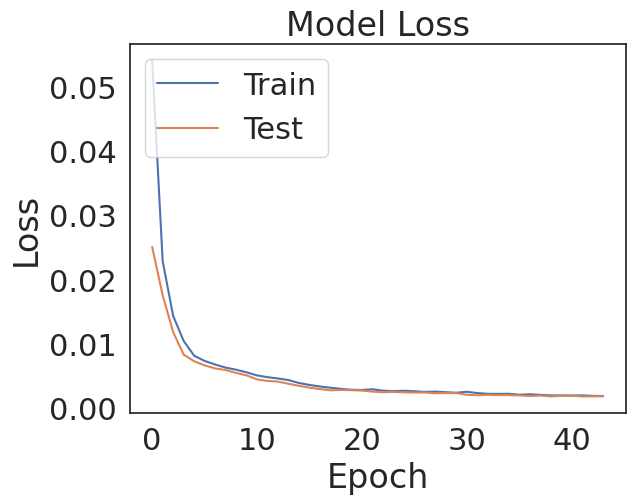

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Define a function in order to plot the original ECG and reconstructed ones and also show the error
def plot(data, n):
  dec_img = autoencoder.predict(data) # this will decode or reconstruct
  plt.plot(data[n], 'b')
  plt.plot(dec_img[n], 'r')
  plt.fill_between(np.arange(plot_dim), data[n], dec_img[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Error'])
  plt.show()

42/42 [==============================] - 0s 3ms/step


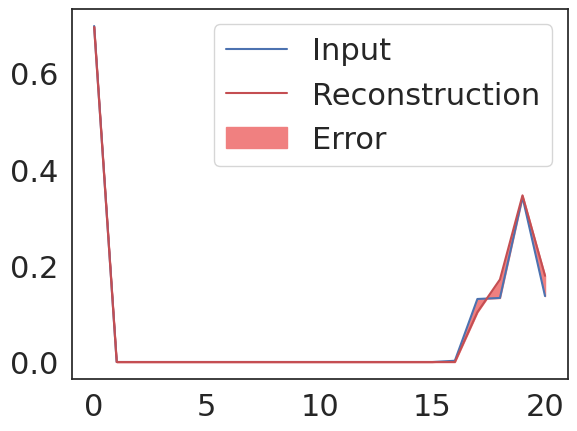

2/2 [==============================] - 0s 5ms/step


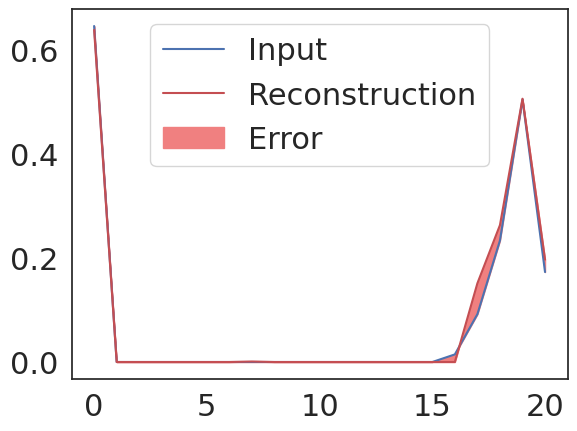

In [ ]:
plot(normal_test_data, 4) # here n shows the index of ecg samples
plot(fraud_test_data, 4)

126/126 [==============================] - 0s 3ms/step
0.008707968213801497


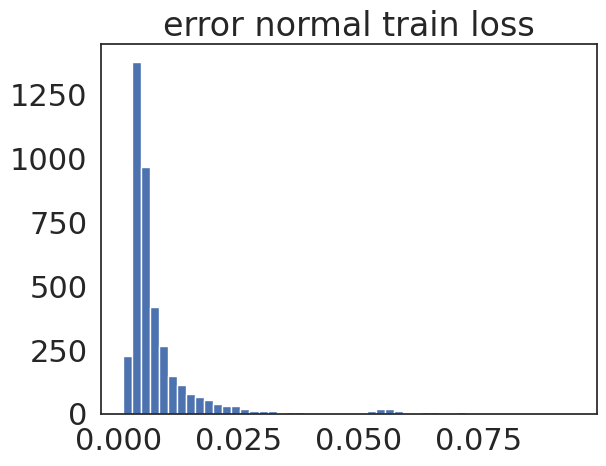

In [ ]:
### calculating the train error  in legit transactions
reconstructed = autoencoder.predict(normal_train_data)
train_normal_loss = losses.mae(reconstructed, normal_train_data).numpy()
print(np.mean(train_normal_loss))

plt.hist(train_normal_loss, bins = 50)
plt.title('error normal train loss')
plt.show()

5/5 [==============================] - 0s 3ms/step
0.014730169931327551


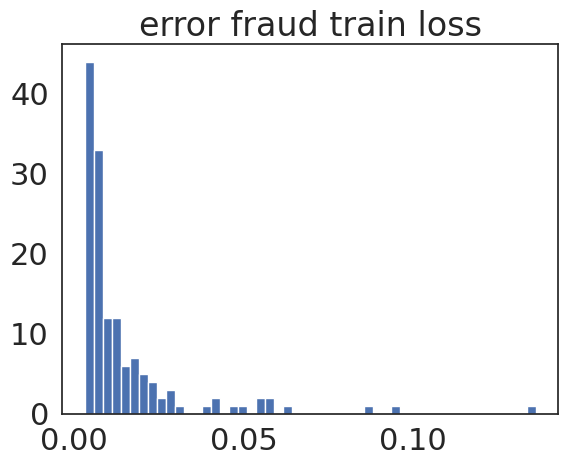

In [ ]:
### calculating the train error  in fraud transactions
reconstructed = autoencoder.predict(fraud_train_data)
train_fraud_loss = losses.mae(reconstructed, fraud_train_data).numpy()
print(np.mean(train_fraud_loss))
plt.hist(train_fraud_loss, bins = 50)
plt.title('error fraud train loss')
plt.show()

In [ ]:
Fraud = df.outlier_label.sum()
total = len(df)
fraud_percentage = (Fraud/total)*100
fraud_percentage
# so lets say that 1% of transactions are fraud so lets find the threshold

3.6148062463851938

In [ ]:
# calcualting the error in the whole train data
reconstructed = autoencoder.predict(X_train)
train_loss = losses.mae(reconstructed, X_train).numpy()

130/130 [==============================] - 0s 2ms/step


In [ ]:
# we are assuming that we have 3% of fraud transaction here
cut_off_1 = np.percentile(train_loss, 97)
cut_off_1

0.04328622519301344

In [ ]:
cut_off_2 = np.mean(train_loss) + 5*np.std(train_loss)
cut_off_2
# 2std division covers 97% of the distribution and here i have taken 3 std division

0.06357986396275873

In [ ]:
reconstructed = autoencoder.predict(X_test)
errors = losses.mae(reconstructed, X_test)
len(errors)
predicted = []
for error in errors:
    if error > cut_off_1:
        predicted.append(1)
    else:
        predicted.append(0)

44/44 [==============================] - 0s 3ms/step


In [ ]:
np.sort(errors)[::-1]

array([0.10545813, 0.10357254, 0.09746345, ..., 0.00151058, 0.00149066,
       0.00127006])

In [ ]:
predicted_fraud_cases = np.array(predicted).sum()
actual_fraud_cases = test_label.sum()
print('predicted_fruad_cases =>'.format(), predicted_fraud_cases, 'true fraud cases =>'.format(), actual_fraud_cases)

predicted_fruad_cases => 50 true fraud cases => 58


In [ ]:
# From booliean Map back to 1 and 0
true_label = test_label.map({True:1,False:0})

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1326
           1       0.04      0.03      0.04        58

    accuracy                           0.92      1384
   macro avg       0.50      0.50      0.50      1384
weighted avg       0.92      0.92      0.92      1384



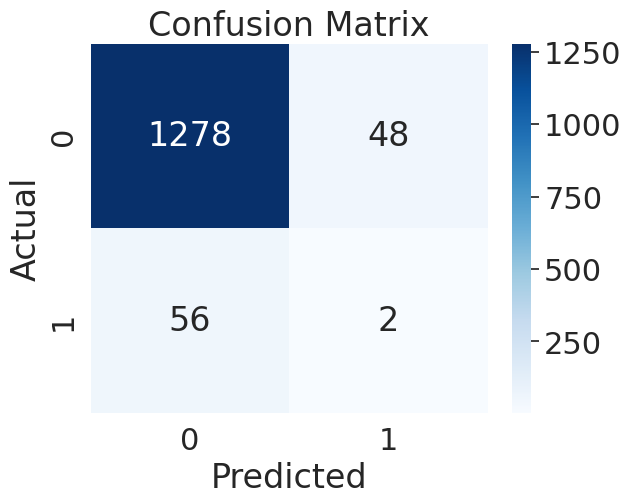

In [ ]:
### classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(true_label, predicted))
plot_confusion_matrix(true_label, predicted)

##  DBSCAN

In [ ]:
dataframe = df.copy()

In [ ]:
X = dataframe.drop('outlier_label', axis=1)
y = dataframe['outlier_label']

In [ ]:
# here we are going to use min max scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.45833333, 1.        , 0.        , ..., 0.03430962, 0.32407407,
        0.03689806],
       [0.625     , 0.        , 0.        , ..., 0.09790795, 0.36574074,
        0.09631019],
       [0.15625   , 0.        , 1.        , ..., 0.09288703, 0.39814815,
        0.08380238],
       ...,
       [0.41666667, 0.        , 0.        , ..., 0.20502092, 0.44907407,
        0.16666667],
       [0.65625   , 1.        , 0.        , ..., 0.17322176, 0.3287037 ,
        0.18542839],
       [0.46875   , 0.        , 0.        , ..., 0.15146444, 0.34259259,
        0.15572233]])

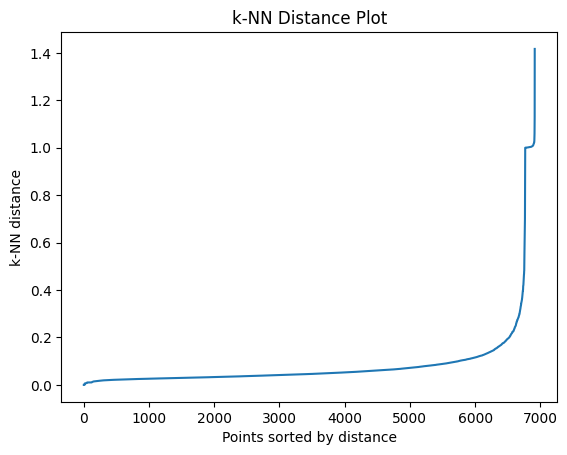

In [ ]:
from sklearn.neighbors import NearestNeighbors


# Step 1: Calculate the k-nearest neighbors
k = 5  # k is usually set to min_samples - 1
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

# Step 2: Sort the distances (4th column)
distances = np.sort(distances[:, k-1], axis=0)

# Step 3: Plot the distances
plt.plot(distances)
plt.ylabel('k-NN distance')
plt.xlabel('Points sorted by distance')
plt.title('k-NN Distance Plot')
plt.show()

# The "elbow" point is a good candidate for `eps`

In [ ]:
from sklearn.cluster import DBSCAN

# Create DBSCAN object
dbscan = DBSCAN(eps=0.2, min_samples=4)

In [ ]:
# Fitting the model
model = dbscan.fit(X_scaled)

In [ ]:
# classification result as labels
labels = model.labels_
labels

array([ 0,  1, -1, ...,  2,  0,  2])

In [ ]:
# Find unique values
unique_values = np.unique(labels)

# Print unique values
print(unique_values)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49]


In [ ]:
# Consider all nodes belonging to -1 as outliers
outlier_indices = np.where(labels == -1)[0]
print(len(outlier_indices))

274


In [ ]:
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
prediction = np.where(labels == -1, 1, 0)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      6666
           1       0.08      0.09      0.09       250

    accuracy                           0.93      6916
   macro avg       0.52      0.53      0.53      6916
weighted avg       0.93      0.93      0.93      6916



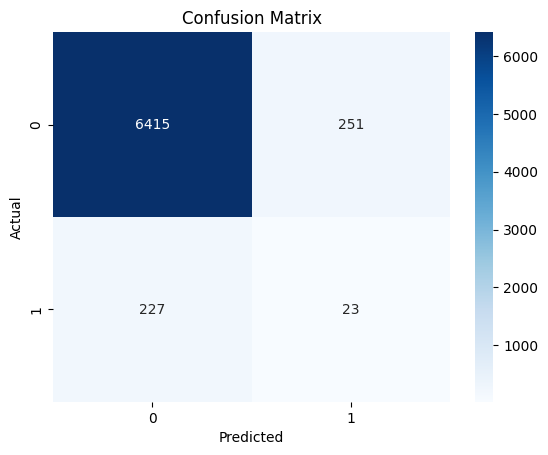

In [ ]:
### classification report
print(classification_report(y, prediction))
plot_confusion_matrix(y, prediction)

## GMM

In [ ]:
dataframe = df.copy()

In [ ]:
# Count anonalies (outlier_label = 1)
num_fraudulent = dataframe['outlier_label'].value_counts().get(1, 0)

# Count normal vales (outlier_label = 0)
num_normal = dataframe['outlier_label'].value_counts().get(0, 0)

# Calculate the ratio
if num_normal > 0:
    ratio = num_fraudulent / num_normal
else:
    ratio = float('inf')  # Avoid division by zero if there are no normal transactions

print(f'Number of fraudulent transactions: {num_fraudulent}')
print(f'Number of normal transactions: {num_normal}')
print(f'Ratio of fraudulent to normal transactions: {ratio: f}')

Number of fraudulent transactions: 250
Number of normal transactions: 6666
Ratio of fraudulent to normal transactions:  0.037504


In [ ]:
y = dataframe['outlier_label']
X = dataframe.drop(['outlier_label'], axis=1)

# Only include normal data
X_normal = Normal.drop(['outlier_label'], axis=1)
Y_normal = Anomaly.drop(['outlier_label'], axis=1)

In [ ]:

# Standardize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_normal_scaled = scaler.fit_transform(X_normal)

In [ ]:
# Split the data into test and validation sets with a 50-50 split
X_test, X_validate, y_test, y_validate = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_validate:", X_validate.shape)
print("Shape of y_validate:", y_validate.shape)

Shape of X_test: (3458, 21)
Shape of y_test: (3458,)
Shape of X_validate: (3458, 21)
Shape of y_validate: (3458,)


In [ ]:
# Convert arrays into DataFrames
X_test_df = pd.DataFrame(X_test, columns=COLUMNS_WITHOUT_LABEL)
X_validate_df = pd.DataFrame(X_validate, columns=COLUMNS_WITHOUT_LABEL)

In [ ]:
from sklearn.mixture import GaussianMixture

# Define the range for n_components
n_components_range = range(1, 11)

# Lists to store the BIC and AIC scores
bic_scores = []
aic_scores = []

# Fit GMM for each n_components and calculate BIC and AIC
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, n_init=5, random_state=42)
    gmm.fit(X_normal_scaled)
    bic_scores.append(gmm.bic(X_normal_scaled))
    aic_scores.append(gmm.aic(X_normal_scaled))

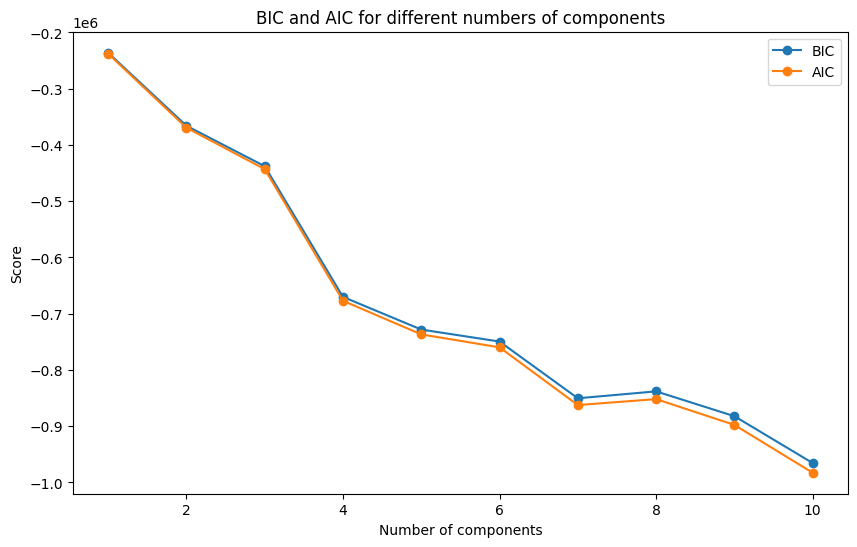

In [ ]:
# Plot BIC and AIC scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.title('BIC and AIC for different numbers of components')
plt.legend()
plt.show()

In [ ]:
# Fit GMM model
gmm = GaussianMixture(n_components=10, n_init=10, random_state=42)
gmm.fit(X_normal_scaled)

GaussianMixture(n_components=10, n_init=10, random_state=42)

In [ ]:
score_for_normal = gmm.score_samples(X_normal_scaled)

In [ ]:
# Compute scores
y_predict = gmm.predict(X_test)
score = gmm.score_samples(X_test)
X_test_df['score'] = score
X_test_df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,score
0,0.354167,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00010,0.111978,0.211715,0.388889,0.196373,68.652256
1,0.572917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00024,0.109192,0.230126,0.347222,0.233896,92.543144
2,0.208333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00378,0.153203,0.235146,0.500000,0.174484,50.615766
3,0.697917,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00400,0.136490,0.128033,0.319444,0.140088,75.638659
4,0.489583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.00580,0.109192,0.178243,0.379630,0.168230,62.517038


In [ ]:
# Determine threshold for anomalies
threshold = np.percentile(score_for_normal, 5)
print(f'The threshold of the score is {threshold:.2f}')

The threshold of the score is 39.96


In [ ]:
# Assign anomaly labels based on the threshold
X_test_df['predicted_class'] = (X_test_df['score'] < threshold).astype(int)

In [ ]:
len(X_test_df[X_test_df['predicted_class']==1])

188

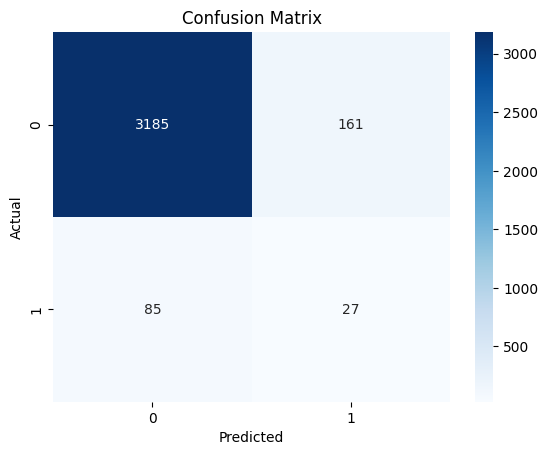

In [ ]:
plot_confusion_matrix(y_test, X_test_df['predicted_class'])

In [ ]:
# Generate classification report
class_report = classification_report(y_test, X_test_df['predicted_class'])
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3346
           1       0.14      0.24      0.18       112

    accuracy                           0.93      3458
   macro avg       0.56      0.60      0.57      3458
weighted avg       0.95      0.93      0.94      3458



## Histogram Based Outlier Score

In [ ]:
dataframe = df.copy()

In [ ]:
dataframe.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,outlier_label
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.061,0.006,0.023,0.087,0.026,1
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.029,0.015,0.061,0.096,0.064,1
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.029,0.019,0.058,0.103,0.056,1
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.114,0.003,0.024,0.061,0.039,1
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.049,0.003,0.005,0.116,0.004,1


In [ ]:
# Seperate feature from target
X = dataframe.drop('outlier_label', axis=1)
y = dataframe['outlier_label']

In [ ]:
# Scale the feature value
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from pyod.models.hbos import HBOS

# Initialize HBOS
hbos = HBOS(contamination=outlier_fraction, n_bins=20)

# Fit HBOS to the data
hbos.fit(X_scaled)

HBOS(alpha=0.1, contamination=0.0375037503750375, n_bins=20, tol=0.5)

In [ ]:
# Predict the outliers
y_pred = hbos.labels_  # binary labels (0: inliers, 1: outliers)
y_scores = hbos.decision_scores_  # raw outlier scores

In [ ]:
# Get the unique values and their counts
values, counts = np.unique(y_pred, return_counts=True)

# Print the count of each value
for value, count in zip(values, counts):
    print(f"Value {value} appears {count} times")

Value 0 appears 6656 times
Value 1 appears 260 times


In [ ]:
print("\nClassification Report:")
print(classification_report(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6666
           1       0.15      0.15      0.15       250

    accuracy                           0.94      6916
   macro avg       0.56      0.56      0.56      6916
weighted avg       0.94      0.94      0.94      6916



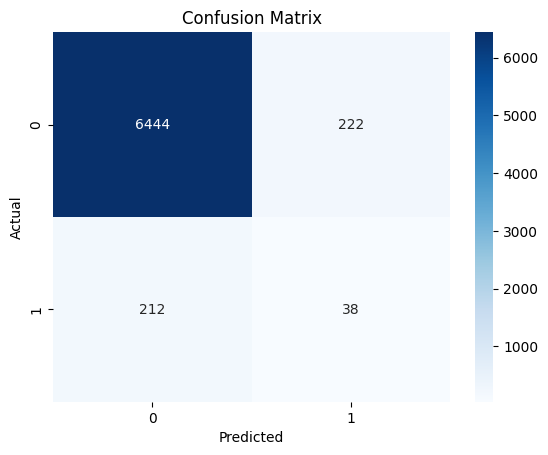

In [ ]:
plot_confusion_matrix(y, y_pred)

## Isolation Forest

In [ ]:
dataframe = df.copy()

In [ ]:
# split train and label
x = dataframe.drop('outlier_label', axis = 1)
y = dataframe['outlier_label']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 42)
x_train = Normal.drop('outlier_label', axis = 1) # remake x_train with only normal data

In [ ]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=100, bootstrap=True, random_state=42)
iforest.fit(x_train)

IsolationForest(bootstrap=True, random_state=42)

In [ ]:
y_pred1 = iforest.predict(x_test)
y_pred1 = np.where(y_pred1 == 1, 0, 1) # normal = 1, anomaly = 0
y_pred2 = iforest.decision_function(x_test) # negative : outliers, positive : inliers

Printing the classification report with fixed parameters...
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1326
           1       0.18      0.19      0.18        58

    accuracy                           0.93      1384
   macro avg       0.57      0.58      0.57      1384
weighted avg       0.93      0.93      0.93      1384

Printing the confusion matrix with fixed parameters...


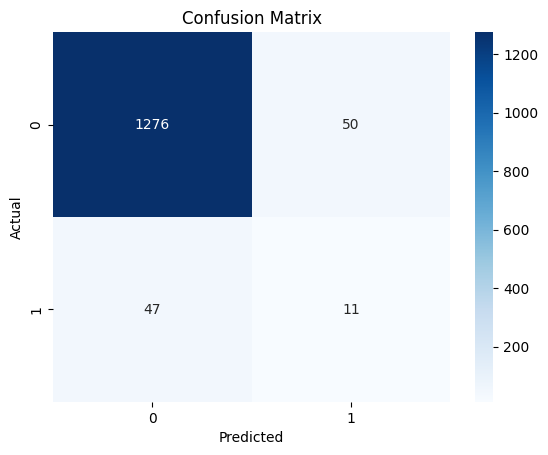

In [ ]:
print("Printing the classification report with fixed parameters...")
print(classification_report(y_test, y_pred1))
print("Printing the confusion matrix with fixed parameters...")
plot_confusion_matrix(y_test, y_pred1)

## KMeans

In [ ]:
dataframe = df.copy()

In [ ]:
# Separate features and target variable
X = dataframe.drop('outlier_label', axis=1)
y = dataframe['outlier_label']

In [ ]:
# Assuming X is your original DataFrame
# Scale the data with StandardScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back into a DataFrame with the original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

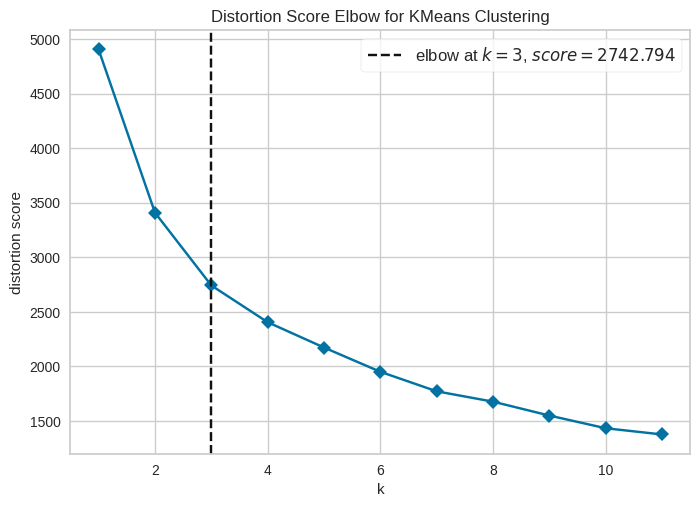

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12),  timings=False)

visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
# Set the optimal number of clusters (based on the ElbowVisualizer output)
optimal_clusters = visualizer.elbow_value_

3

In [ ]:
if optimal_clusters is None:
    print("No optimal number of clusters found.")
    optimal_clusters = 5
else:
    print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 3


In [ ]:
# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# Predict clusters
clusters = kmeans.predict(X_scaled_df)

In [ ]:
# Map clusters to labels by finding the majority label in each cluster
cluster_labels = {}
for cluster in range(optimal_clusters):
    mask = clusters == cluster
    majority_label = y[mask].mode()[0]  # Get the majority label
    cluster_labels[cluster] = majority_label

In [ ]:
# Identify the cluster with the highest number of anomaly '1' classes
anomaly_cluster = max(cluster_labels, key=cluster_labels.get)

In [ ]:
# Generate predictions based on the identified cluster
y_pred = np.array([1 if cluster == anomaly_cluster else 0 for cluster in clusters])

In [ ]:
distances

array([0.        , 0.        , 0.        , ..., 1.10848537, 1.12992814,
       1.41669399])

<Figure size 1200x800 with 0 Axes>

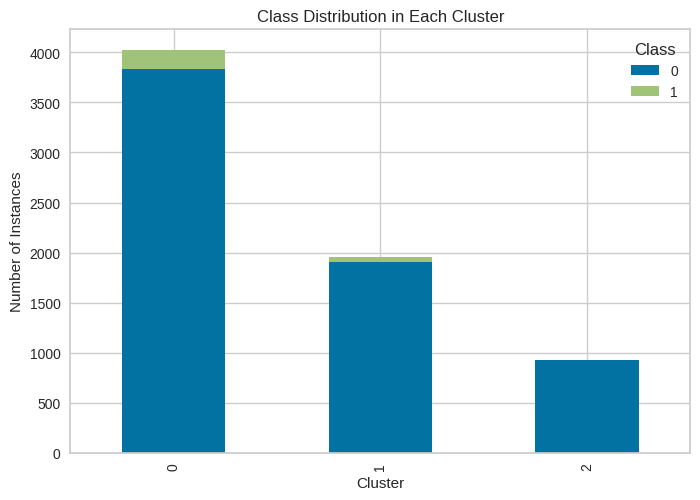

In [ ]:
# Create a DataFrame for cluster and class labels
cluster_class_df = pd.DataFrame({'Cluster': clusters, 'Class': y})

# Plot class distribution in each cluster
plt.figure(figsize=(12, 8))
cluster_class_dist = cluster_class_df.groupby(['Cluster', 'Class']).size().unstack(fill_value=0)
cluster_class_dist.plot(kind='bar', stacked=True)
plt.title('Class Distribution in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Instances')
plt.legend(title='Class', loc='upper right')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.42      0.59      6666
           1       0.05      0.76      0.09       250

    accuracy                           0.44      6916
   macro avg       0.51      0.59      0.34      6916
weighted avg       0.95      0.44      0.57      6916



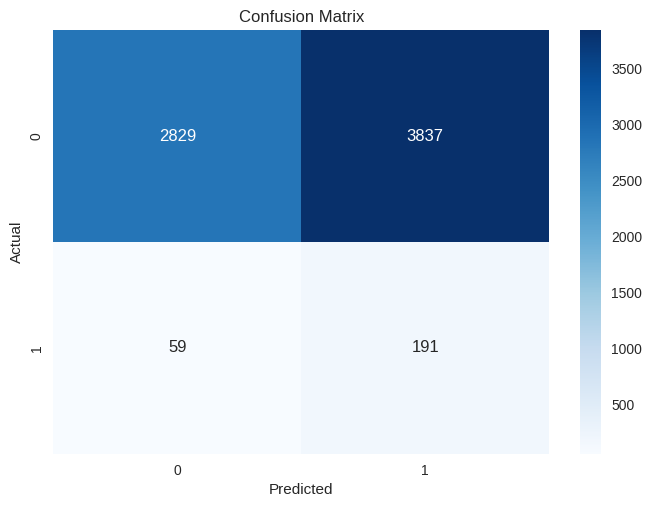

In [ ]:
# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
plot_confusion_matrix(y, y_pred)

## Local Otlier Factor

In [ ]:
dataframe = df.copy()

In [ ]:
# Seperate labels from target
X = dataframe.drop('outlier_label', axis=1)
y = dataframe['outlier_label']

In [ ]:
# Standardize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.45833333, 1.        , 0.        , ..., 0.03430962, 0.32407407,
        0.03689806],
       [0.625     , 0.        , 0.        , ..., 0.09790795, 0.36574074,
        0.09631019],
       [0.15625   , 0.        , 1.        , ..., 0.09288703, 0.39814815,
        0.08380238],
       ...,
       [0.41666667, 0.        , 0.        , ..., 0.20502092, 0.44907407,
        0.16666667],
       [0.65625   , 1.        , 0.        , ..., 0.17322176, 0.3287037 ,
        0.18542839],
       [0.46875   , 0.        , 0.        , ..., 0.15146444, 0.34259259,
        0.15572233]])

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Works just like K-nearest neighbor so n_neighbour parameter stands for no. of neighbors we have to search for a datapoint
# contamination parameter influences how aggressively the LOF algorithm identifies outliers
LOF_classifier = LocalOutlierFactor(n_neighbors=10, algorithm='auto', metric='minkowski',
                   p=2, metric_params=None, contamination=0.05)

In [ ]:
y_pred = LOF_classifier.fit_predict(X_scaled)
y_pred

array([-1,  1,  1, ...,  1,  1,  1])

In [ ]:
# Higher the lower the value(keep in my values are negative) higher the chance of it being outlier
score_prediction = LOF_classifier.negative_outlier_factor_
score_prediction

array([-2.11858834, -1.50008941, -1.0996433 , ..., -1.12231984,
       -1.0468676 , -0.9889687 ])

In [ ]:
outlier_indices = np.where(y_pred == -1)[0]
print(len(outlier_indices))

346


In [ ]:
# !! CAREFUL RUN ONLY ONCE
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [ ]:
print("Accuracy Score :", accuracy_score(y, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y, y_pred))
print("Classification Report :")
print(classification_report(y, y_pred))

Accuracy Score : 0.9230769230769231
Confusion Matrix: 
[[6352  314]
 [ 218   32]]
Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      6666
           1       0.09      0.13      0.11       250

    accuracy                           0.92      6916
   macro avg       0.53      0.54      0.53      6916
weighted avg       0.94      0.92      0.93      6916



## One-Class SVM

In [ ]:
dataframe = df.copy()

In [ ]:
X = dataframe.drop('outlier_label', axis=1)
y = dataframe['outlier_label']

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.37381409,  1.50050924, -0.39440532, ..., -2.49798316,
        -0.55943924, -2.52374039],
       [ 0.47207276, -0.66644042, -0.39440532, ..., -1.41857341,
        -0.08886888, -1.44467614],
       [-1.90698403, -0.66644042,  2.53546276, ..., -1.50378997,
         0.27713029, -1.67184756],
       ...,
       [-0.58528581, -0.66644042, -0.39440532, ...,  0.39937984,
         0.85227184, -0.1668369 ],
       [ 0.63067655,  1.50050924, -0.39440532, ..., -0.14032503,
        -0.50715365,  0.17392024],
       [-0.32094617, -0.66644042, -0.39440532, ..., -0.50959679,
        -0.35029686, -0.36561189]])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f'There are {X_train.shape[0]} samples in the training set and {X_test.shape[0]} samples in the test set.')

There are 4841 samples in the training set and 2075 samples in the test set.


In [ ]:
# Train One-Class SVM on normal transactions only
X_train_normal = X_train[y_train == 0]

In [ ]:
from sklearn.svm import OneClassSVM

# Initialise OneClassSVM class
ocsvm = OneClassSVM(kernel='rbf', nu=0.01, gamma='auto')

In [ ]:
# Fiting the data
ocsvm.fit(X_train_normal)

OneClassSVM(gamma='auto', nu=0.01)

In [ ]:
# Check number of anomaly in  y test
len(y_test[y_test == 1])

84

In [ ]:
# Predict on the test set
y_pred = ocsvm.predict(X_test)

In [ ]:
# Map predictions to 0 for normal and 1 for anomaly to match the original labels
y_pred = [1 if x == -1 else 0 for x in y_pred]

In [ ]:
anomalies_count = sum(y_pred)
print("Number of anomalies predicted:", anomalies_count)

Number of anomalies predicted: 103


In [ ]:
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1991
           1       0.19      0.24      0.21        84

    accuracy                           0.93      2075
   macro avg       0.58      0.60      0.59      2075
weighted avg       0.94      0.93      0.93      2075



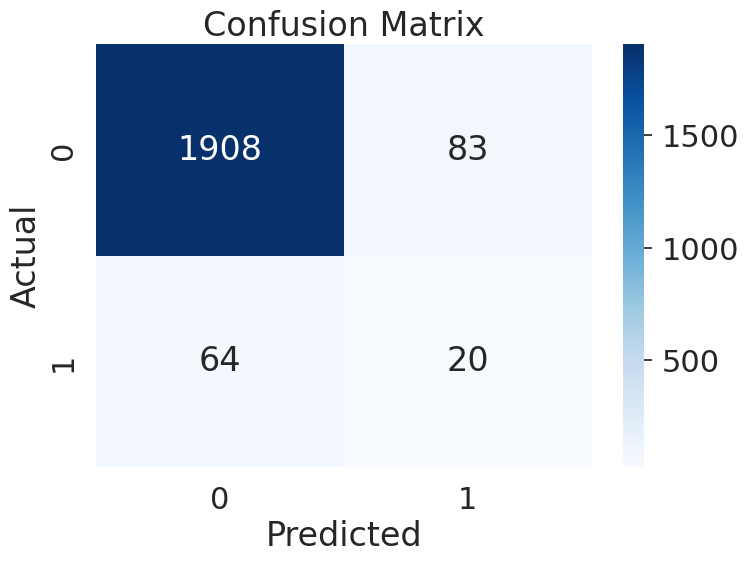

In [ ]:
plot_confusion_matrix(y_test, y_pred)

## Minimum Covariance Determinant

In [ ]:
dataframe = df.copy()

In [ ]:
X = dataframe.drop('outlier_label', axis=1)
y = dataframe['outlier_label']

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.37381409,  1.50050924, -0.39440532, ..., -2.49798316,
        -0.55943924, -2.52374039],
       [ 0.47207276, -0.66644042, -0.39440532, ..., -1.41857341,
        -0.08886888, -1.44467614],
       [-1.90698403, -0.66644042,  2.53546276, ..., -1.50378997,
         0.27713029, -1.67184756],
       ...,
       [-0.58528581, -0.66644042, -0.39440532, ...,  0.39937984,
         0.85227184, -0.1668369 ],
       [ 0.63067655,  1.50050924, -0.39440532, ..., -0.14032503,
        -0.50715365,  0.17392024],
       [-0.32094617, -0.66644042, -0.39440532, ..., -0.50959679,
        -0.35029686, -0.36561189]])

In [ ]:
from pyod.models.mcd import MCD

mcd_detector = MCD(contamination=outlier_fraction, support_fraction=1, random_state=42)

In [ ]:
# Fit the model
mcd_detector.fit(X_scaled)

MCD(assume_centered=False, contamination=0.0375037503750375, random_state=42,
  store_precision=True, support_fraction=1)

In [ ]:
# Get the prediction
mcd_pred = mcd_detector.predict(X_scaled)
# Get the decision scores
mcd_scores = mcd_detector.decision_scores_

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_auc_score, f1_score, adjusted_rand_score, mutual_info_score, precision_recall_curve, auc
# Calculate ROC AUC
roc_auc = roc_auc_score(y, mcd_scores)
f1 = f1_score(y, mcd_pred)
ari = adjusted_rand_score(y, mcd_pred)
mi_score = mutual_info_score(y, mcd_pred)

In [ ]:
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Adjusted Rand Index:", ari)
print("Mutual Information Score:", mi_score)

ROC AUC Score: 0.792966096609661
F1 Score: 0.29411764705882354
Adjusted Rand Index: 0.25213050585172103
Mutual Information Score: 0.015882709850147912


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6666
           1       0.29      0.30      0.29       250

    accuracy                           0.95      6916
   macro avg       0.63      0.64      0.63      6916
weighted avg       0.95      0.95      0.95      6916

Recall score: 0.3


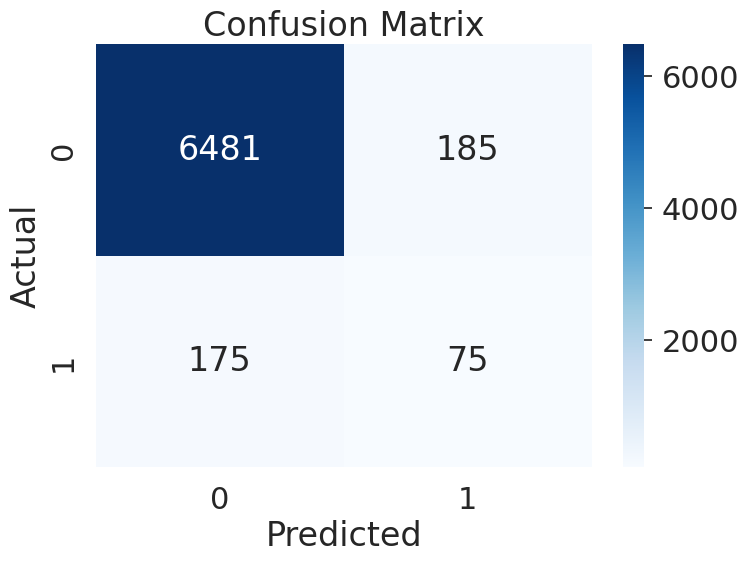

In [ ]:
print(classification_report(y, mcd_pred))
print(f"Recall score: {recall_score(y, mcd_pred)}")

plot_confusion_matrix(y, mcd_pred)

Check wheather this will work with only boolean data